# Softmax regression

In [14]:
# Import necessary modules to access files in another folder in the project
import sys
import os
import mynbconfig
mynbconfig.add_syspath()

from sklearn import datasets
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [15]:
from just4funml.algorithms.supervised import SoftmaxRegression

In [16]:
iris = datasets.load_iris()

X = iris['data'][:, (2, 3)]
y = iris['target']

In [17]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [18]:
softmax_reg_unregularized = SoftmaxRegression(learning_rate=0.01, max_iter=5001, random_state=2042)
softmax_reg_unregularized.fit(X_train, y_train)

0 2.492671382647734
500 0.8767239744120758
1000 0.6851344335710489
1500 0.5825294998080239
2000 0.5197095199108983
2500 0.4768585903685806
3000 0.44526994193866637
3500 0.42065832548143345
4000 0.40069504853340226
4500 0.38400842921390127
5000 0.36973626902219436


In [19]:
softmax_reg_unregularized.Theta

array([[ 4.42692952,  0.71095755, -1.01358673],
       [-0.02224394,  0.74069741,  0.34024946],
       [-1.71053696,  0.48416904,  2.79234272]])

In [20]:
y_predict = softmax_reg_unregularized.predict(X_valid)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9

In [28]:
softmax_reg_l2 = SoftmaxRegression(learning_rate=0.1, max_iter=5001, alpha=0.1, regularized_type='l2', random_state=2042)
softmax_reg_l2.fit(X_train, y_train)

0 2.620198512319468
500 0.5205050905370611
1000 0.4909358426661884
1500 0.4830438290437207
2000 0.48022629393007854
2500 0.47912038093444564
3000 0.4786656740538428
3500 0.4784737540839983
4000 0.47839146173331193
4500 0.4783558268238266
5000 0.4783402986164198


In [22]:
y_predict = softmax_reg_l2.predict(X_valid)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

In [23]:
softmax_reg_early_stop = SoftmaxRegression(learning_rate=0.1, max_iter=5001, regularized_type='l2', 
                                            early_stopping=True, alpha=0.1)
softmax_reg_early_stop.fit(X_train, y_train)                                            

0 4.8135185772316325
500 0.5135066972154321
1000 0.4895765695419281
1500 0.48258892284803556
2000 0.4800521194102045
2500 0.47904970557355275
3000 0.4786360746245867
3500 0.4784611229833678
4000 0.47838600869552916
4500 0.47835345526097994
5000 0.4783392622973897


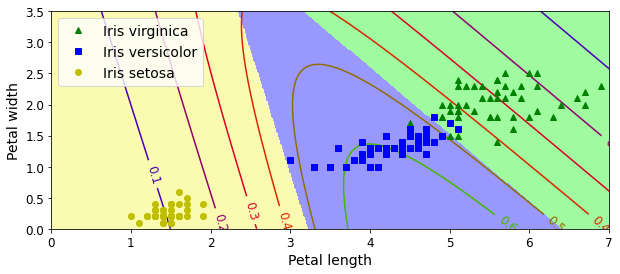

In [24]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

Y_proba = softmax_reg_early_stop.predict(X_new, return_in_prob=True)
y_predict = softmax_reg_early_stop.predict(X_new)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [25]:
y_predict = softmax_reg_early_stop.predict(X_test)
accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9666666666666667